# 1 - Preprocessing

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

## Access data files

In [2]:
current_dir = Path.cwd()
parent_dir = current_dir.parent

dataset_train = pd.read_csv(parent_dir/"Overall_input.csv")
#Access input folder
#input_dir1 = Path (parent_dir/"Pressure_profiles")
#print ("input",input_dir1)

In [3]:
#Access folders inside input folder
input_dir2_train =  [folder_input for folder_input in input_dir1.iterdir() if folder_input.is_dir()]
print ("2",input_dir2_train)

2 [WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_01'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_03'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_05'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_07'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_09'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_11'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_13'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_15'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_17'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_19'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_21'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_h

In [4]:
# Access each folder inside input folder
dataset_train = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure'])
df_list_train = []
for folder_train in input_dir2_train:
    
    # Make a list of data file names
    files_train = list(file_train for file_train in folder_train.rglob("*.xlsx") if int(file_train.stem[1:]) < 14)
    print ("folder", folder_train)
    
    for file_train in files_train:
        df_list_train.append(pd.read_excel(file_train))
        print (file_train.stem)

dataset_train = pd.concat(df_list_train, ignore_index = True)

folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_01
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_03
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_05
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_07
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_09
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_11
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_13
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_15
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_17
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_19
P1
P13
P5
P9
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_21
P1
P13
P5
P9
folder H:\

In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492215 entries, 0 to 492214
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Charge_mass        492215 non-null  float64
 1   Standoff_distance  492215 non-null  int64  
 2   Time               492215 non-null  float64
 3   Phase              492215 non-null  int64  
 4   Pressure           492215 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 18.8 MB


In [4]:
y = dataset_train['Pressure']
X = dataset_train.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(492215, 4) (492215,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

## Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])

In [9]:
print (X_train)

[[-1.93352006  0.43839445  0.08858652  1.        ]
 [ 0.82685163 -1.32939973  0.66947475 -1.        ]
 [ 0.62237966  1.32229154 -0.65582353 -1.        ]
 ...
 [ 1.23579559  0.43839445 -0.729832   -1.        ]
 [ 0.52014367 -1.32939973 -1.26167132  1.        ]
 [ 1.44026756  1.32229154 -1.13087397  1.        ]]


In [10]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[-0.50221622  0.43839445 -0.30556074 -1.        ]
 [-2.03575605 -1.32939973 -0.99230388  1.        ]
 [ 1.23579559  1.32229154 -0.63001036 -1.        ]
 ...
 [ 1.23579559 -1.32939973  1.34415221  1.        ]
 [ 1.49138556 -1.32939973  0.58685962 -1.        ]
 [ 1.23579559  0.43839445 -0.5611701  -1.        ]]


# 2 - Model training

## Calling the XGB Regressor

In [12]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 67)

## Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [900, 1000, 1100, 1200],
               'max_depth': [3, 4, 5, 6],
               'gamma': [5, 1, 0.1, 0.01], 
               'learning_rate' : [0.001, 0.01, 0.1, 0.2] }]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 3,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

## Training the XGB Regression model on the Training set

In [13]:
regressor = XGBRegressor(n_estimators = 1000,
                         max_depth = 15,
                         gamma = 1, 
                         learning_rate = 0.1,
                         random_state = 67)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=67, ...)

## Create a KFold object with 5 splits 

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())

KeyboardInterrupt: 

# 3 - Prediction

## Predicting the Test set results

In [14]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 89463.62  89545.6 ]
 [100994.65 100991.47]
 [ 86605.23  86665.3 ]
 ...
 [101256.3  101254.41]
 [ 99332.99  99971.85]
 [ 96673.29  96792.46]]


## Print Output

In [18]:
df = pd.DataFrame(file).T
df.to_excel(excel_writer = "E:/PhD/Machine Learning/Pressure_paper1/Output_XGB.xlsx")

PermissionError: [Errno 13] Permission denied: 'E:\\PhD\\Machine Learning\\Pressure_paper1/Output.xlsx'

# 4 - Evaluation

## Evaluating the Model Performance

### R2

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9120829500812447


In [16]:
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print (r2_train)

0.9999988909259839


### Adj R2

In [17]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9120811638845082


### RMSE

In [18]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

29783.52749826539

### MAE

In [19]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

569.995778447344

## Visualize

Text(0, 0.5, 'Predicted data')

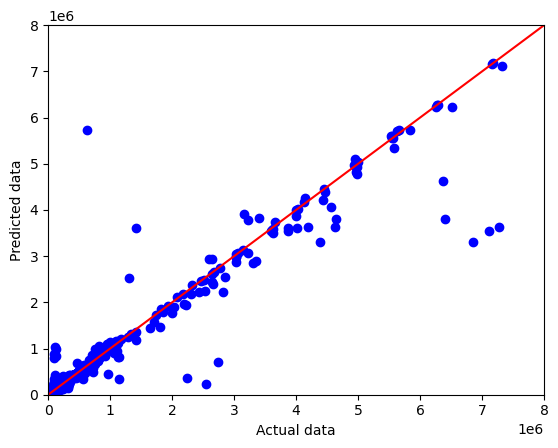

In [21]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,8000000],[0,8000000], color = "red")
plt.axis ([0,8000000,0,8000000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

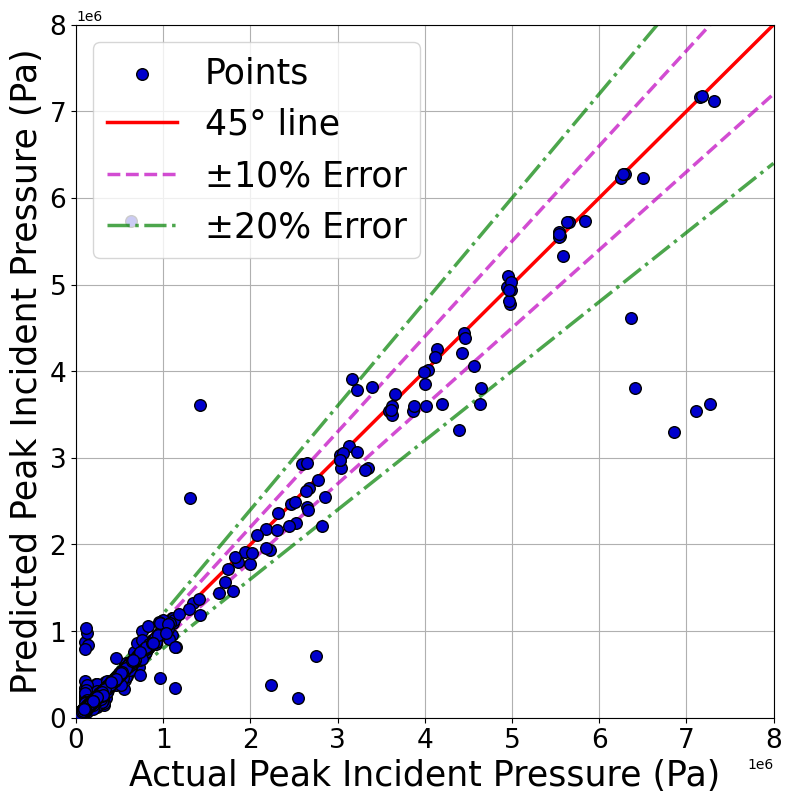

In [23]:
from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (Pa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (Pa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,8000000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000000)
plt.xlim(0, 8000000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

## Error margins

In [24]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 99.49%
Within 20% margin 99.70%
Out of 20% margin 0.30%


## <2000 kPa

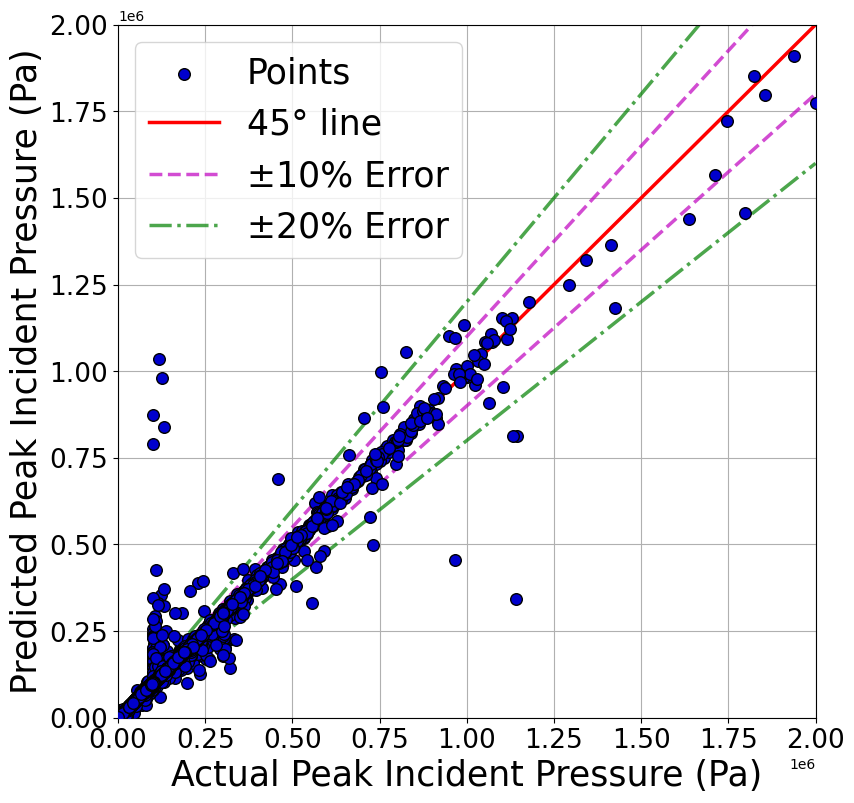

In [25]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (Pa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (Pa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,2000000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 2000000)
plt.xlim(0, 2000000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (300, 100),fontsize = 25)  #Model is called here

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')